In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [60]:
# Reading data into a DataFrame
file = pd.read_csv('measurements.csv')
file.shape

(388, 12)

In [61]:
file.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


## Standardize header names.


In [62]:
file.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [63]:
# rename column name
file = file.rename(columns={'temp_inside':'temp inside', 'temp_outside':'temp outside','gas_type': 'gas type' })
file.head()

,distance,consume,speed,temp inside,temp outside,specials,gas type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [64]:
cols = []
for column in file.columns:
    cols.append(column.lower())
file.columns = cols

file.head()

,distance,consume,speed,temp inside,temp outside,specials,gas type,ac,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [65]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp inside    376 non-null    object
 4   temp outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas type       388 non-null    object
 7   ac             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [66]:
def comma_converter(x):
    if type(x) == str and ',' in x:
        a = x.split(',')
        return float(a[0] + '.' + a[1])
    else:
        return float(x)
    
#Converting the data
file['distance'] = file['distance'].apply(comma_converter)
file['consume'] = file['consume'].apply(comma_converter)
file['temp inside'] = file['temp inside'].apply(comma_converter)
file['temp inside'] = file['temp inside'].apply(comma_converter)
file['refill liters'] = file['refill liters'].apply(comma_converter)

In [67]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp inside    376 non-null    float64
 4   temp outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas type       388 non-null    object 
 7   ac             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [68]:
file['km_absolute'] = file['distance'].cumsum()
file['consume_liter'] = file['consume']/100*file['distance']

## Visualizing the data


First, I would like to the relations between the distance, speed, consume. How distributing the trip distances along the full range etc.:

1.distance vs Km_Absolute
2.consume vs distance
3.temp_outside vs km_absolute
4.consume vs speed

The colors representing the gas type inside of the tank.

Text(9.100270629084967, 0.5, 'distance [Km]')

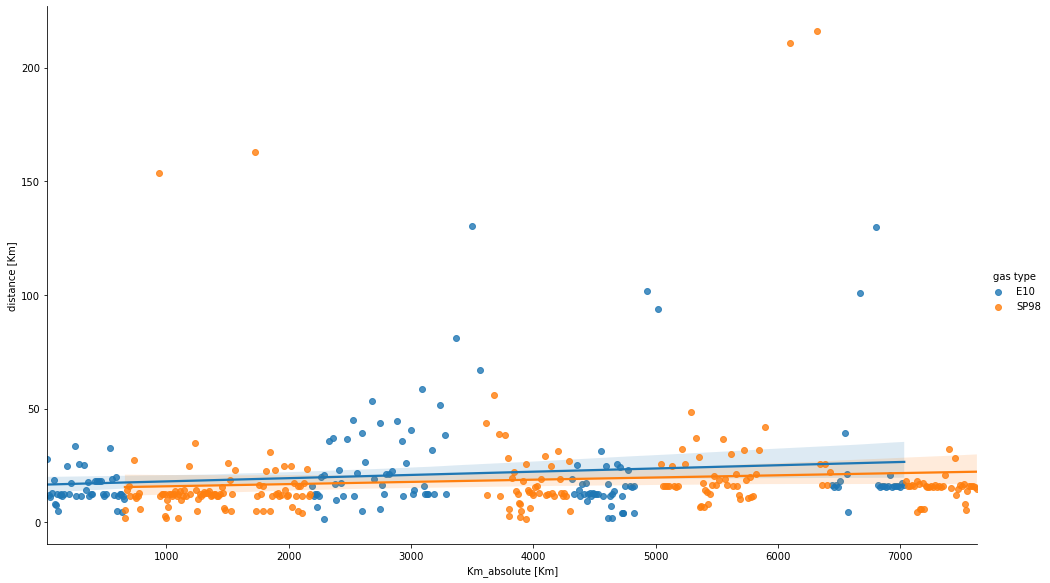

In [69]:
# Distance vs Km_Absolute
sns.lmplot(data=file,x='km_absolute',y='distance', hue='gas type', height=8, aspect=1.7,)
plt.xlabel('Km_absolute [Km]')
plt.ylabel('distance [Km]')

Text(8.703135212418303, 0.5, 'consume [l/100km]')

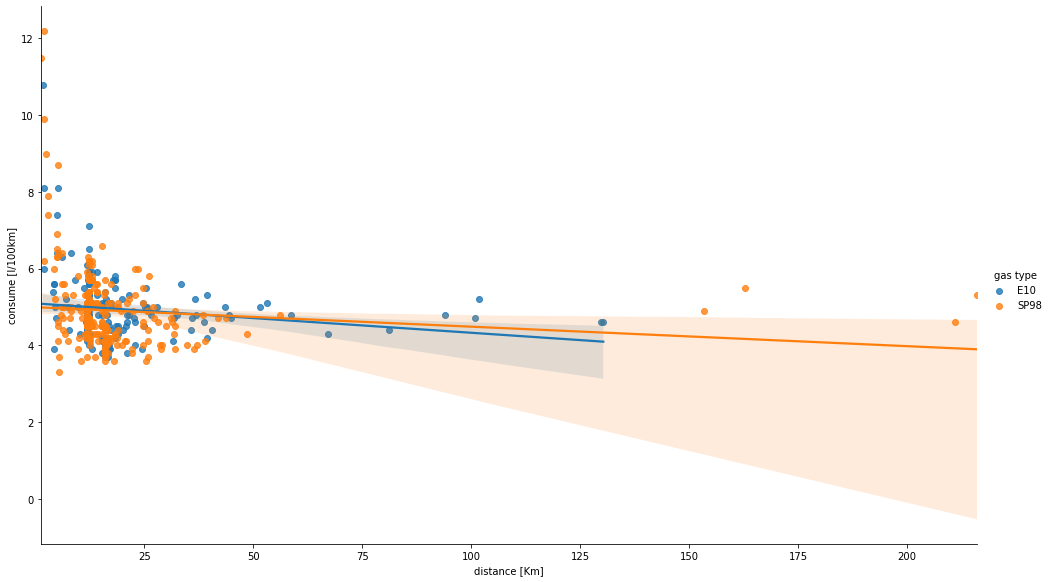

In [70]:
#Consume vs Km_absolute
sns.lmplot(data = file, x = 'distance', y = 'consume', hue = 'gas type', height=8,aspect=1.7)
plt.xlabel('distance [Km]')
plt.ylabel('consume [l/100km]')

Text(8.827726715686275, 0.5, 'temp outside [°C]')

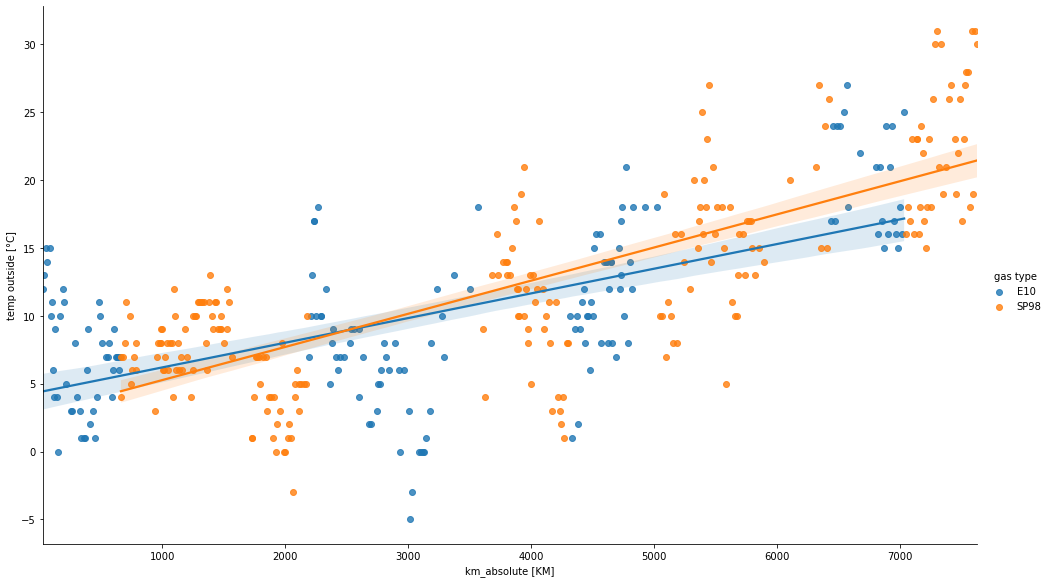

In [71]:
sns.lmplot(data = file, x = 'km_absolute', y = 'temp outside',hue='gas type', height=8, aspect=1.7)
plt.xlabel('km_absolute [KM]')
plt.ylabel('temp outside [°C]')

Text(8.703135212418303, 0.5, 'consume [l/100km]')

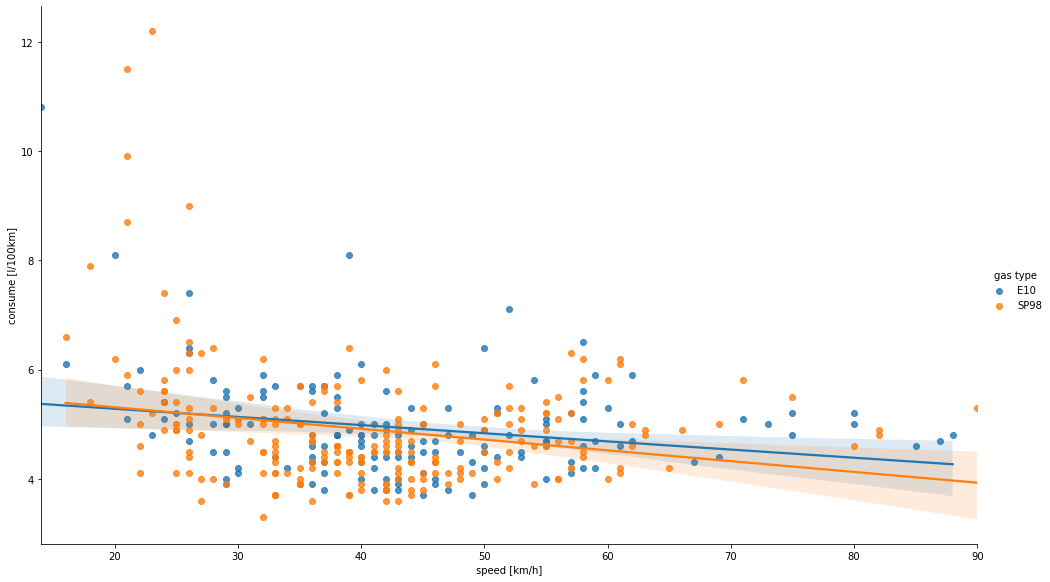

In [72]:
sns.lmplot(data=file, x = 'speed',y =  'consume',hue = 'gas type', height=8, aspect=1.7)
plt.xlabel('speed [km/h]')
plt.ylabel('consume [l/100km]')

In [73]:
km_e10 = file[file['gas type'] == 'E10']['distance'].sum()
km_sp98 = file[file['gas type'] == 'SP98']['distance'].sum()

avg_e10 = file[file['gas type'] == 'E10']['distance'].mean()
avg_sp98 = file[file['gas type'] == 'SP98']['distance'].mean()

std_e10 = file[file['gas type'] == 'E10']['distance'].std()
std_sp98 = file[file['gas type'] == 'SP98']['distance'].std()

print('DISTANCES:')
print('Kilometers with E10: ' + str(km_e10))
print('Kilometers with SP98: ' + str(km_sp98))
print('Average distance with E10: ' + str(avg_e10))
print('Average distance with SP98: ' + str(avg_sp98))
print('Deviation of the distances with E10: ' + str(std_e10))
print('Deviation of the distancees with SP98: ' + str(std_sp98))
print('\n')
print(100*'*')
print('\n')
print('SPEED:')
avg_sp_e10 = file[file['gas type'] == 'E10']['speed'].mean()
avg_sp_sp98 = file[file['gas type'] == 'SP98']['speed'].mean()

std_sp_e10 = file[file['gas type'] == 'E10']['speed'].std()
std_sp_sp98 = file[file['gas type'] == 'SP98']['speed'].std()

print('Average speed with E10: ' + str(avg_sp_e10))
print('Average speed with SP98: ' + str(avg_sp_sp98))
print('Deviation of the speed with E10: ' + str(std_sp_e10))
print('Deviation of the speed with SP98: ' + str(std_sp_sp98))

DISTANCES:
Kilometers with E10: 3375.4
Kilometers with SP98: 4249.9
Average distance with E10: 21.096250000000005
Average distance with SP98: 18.639912280701765
Deviation of the distances with E10: 20.3072341650448
Deviation of the distancees with SP98: 24.179598455931174


****************************************************************************************************


SPEED:
Average speed with E10: 43.50625
Average speed with SP98: 40.82017543859649
Deviation of the speed with E10: 14.077948711978845
Deviation of the speed with SP98: 13.170121570119575


## Checking how many kilometre is

In [74]:
num = file['refill liters'].count()
num_list = []

for i in range(num):
    num_list.append(i)
num_list = num_list[::-1]
    
def refill_events(x):
    if x > 0:
        return num_list.pop()
    else:
        pass
#Creating the event column   
file['refill_event'] = file['refill liters'].apply(refill_events)

In [75]:
#replace Nan value with the last value
file['refill liters'].fillna(method = 'bfill', inplace = True)
file['refill_event'].fillna(method = 'bfill', inplace = True)

In [76]:
consume_per_refill = file.groupby('refill_event').agg({'consume_liter': sum, 'refill liters': np.mean, 'gas type' : 'first', 'km_absolute': 'last','distance':sum})
consume_per_refill.sort_values('km_absolute', inplace= True)

In [77]:
consume_per_refill

,consume_liter,refill liters,gas type,km_absolute,distance
refill_event,,,,,
0.0,1.4000,45.0,E10,28.0,28.0
1.0,32.7292,37.6,E10,662.3,634.3
2.0,29.8031,37.7,SP98,1262.8,600.5
3.0,24.4745,45.0,SP98,1725.4,462.6
4.0,24.7634,38.0,SP98,2192.3,466.9
5.0,33.8630,38.3,E10,2887.4,695.1
6.0,33.9869,10.0,E10,3609.2,721.8
7.0,0.5082,39.0,SP98,3621.3,12.1
8.0,32.3618,39.0,SP98,4317.9,696.6


Text(0, 0.5, '[liter]')

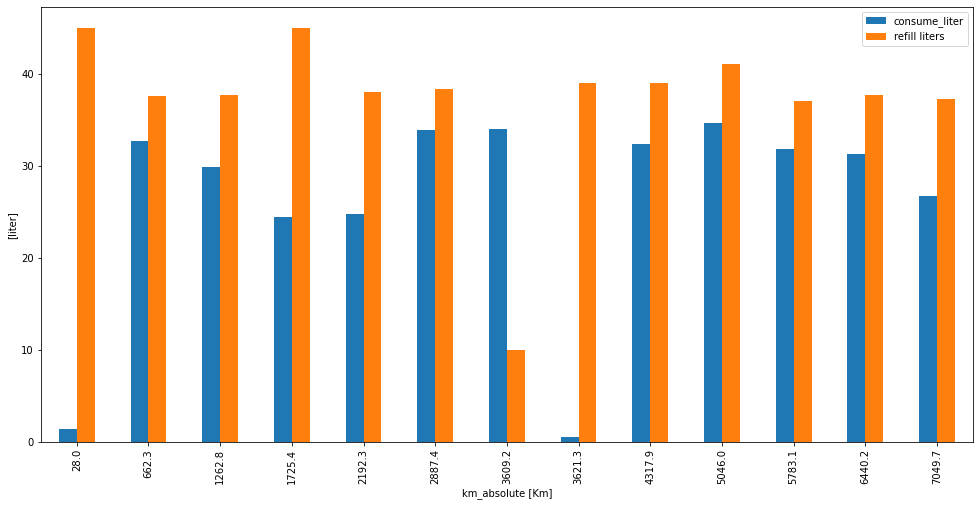

In [78]:
consume_per_refill.round(2).plot('km_absolute',['consume_liter','refill liters'], kind='bar',figsize=(16.7,8))
plt.xlabel('km_absolute [Km]')
plt.ylabel('[liter]')

In [79]:
consume_per_refill['tank_inhalt'] = 0
consume_per_refill['tank_inhalt'] =-consume_per_refill['consume_liter']+consume_per_refill['refill liters']
consume_per_refill['tank_inhalt'] = consume_per_refill['tank_inhalt']
#The first refill supopse to be 45l.
consume_per_refill['tank_inhalt'].loc[0] = 45
consume_per_refill['tank_inhalt'] = consume_per_refill['tank_inhalt'].cumsum()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [80]:
consume_per_refill

,consume_liter,refill liters,gas type,km_absolute,distance,tank_inhalt
refill_event,,,,,,
0.0,1.4000,45.0,E10,28.0,28.0,45.0000
1.0,32.7292,37.6,E10,662.3,634.3,49.8708
2.0,29.8031,37.7,SP98,1262.8,600.5,57.7677
3.0,24.4745,45.0,SP98,1725.4,462.6,78.2932
4.0,24.7634,38.0,SP98,2192.3,466.9,91.5298
5.0,33.8630,38.3,E10,2887.4,695.1,95.9668
6.0,33.9869,10.0,E10,3609.2,721.8,71.9799
7.0,0.5082,39.0,SP98,3621.3,12.1,110.4717
8.0,32.3618,39.0,SP98,4317.9,696.6,117.1099


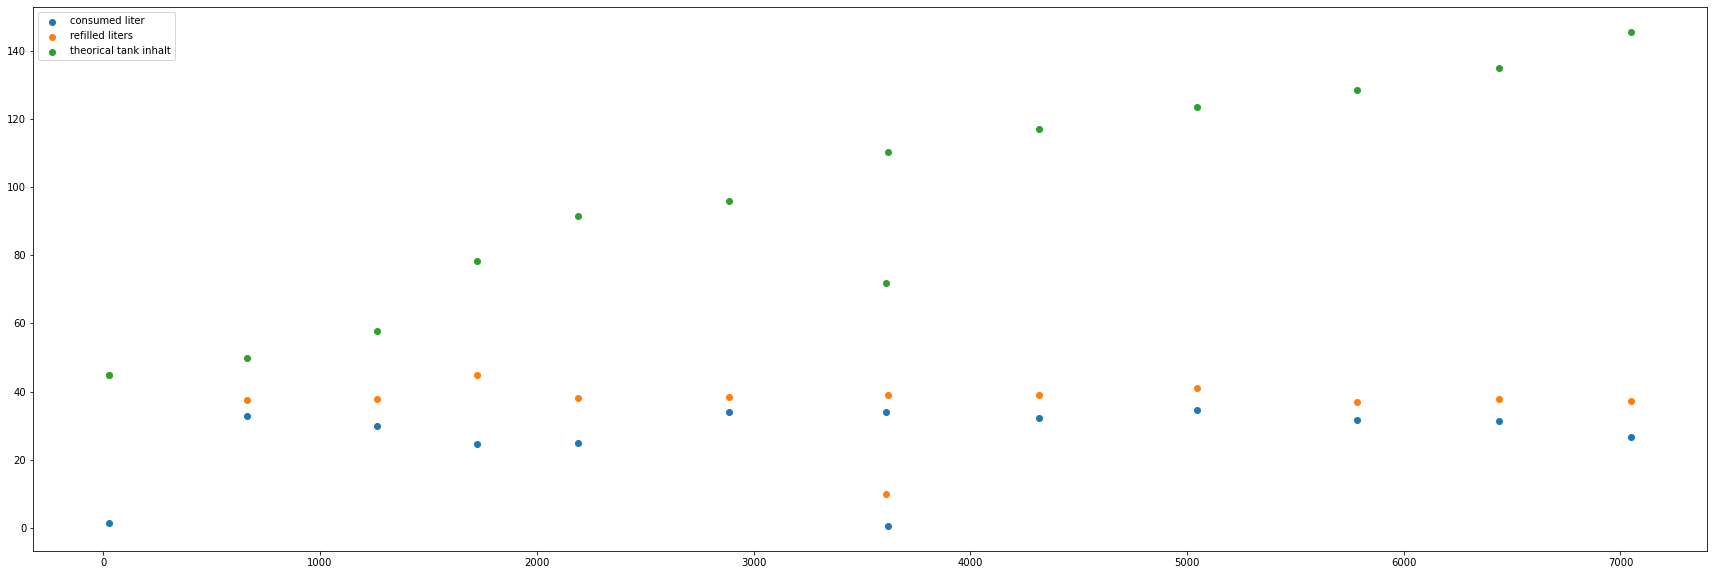

In [81]:
plt.figure(figsize=(30,10))
plt.scatter(consume_per_refill['km_absolute'],consume_per_refill['consume_liter'],)
plt.scatter(consume_per_refill['km_absolute'],consume_per_refill['refill liters'],)
plt.scatter(consume_per_refill['km_absolute'],consume_per_refill['tank_inhalt'],)
plt.legend(['consumed liter','refilled liters','theorical tank inhalt'])